In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.simplefilter(action="ignore")

In [15]:
from google.colab import drive

In [17]:
df= pd.read_csv('https://drive.google.com/file/d/10LGzNSBk0bVn82H2S1eD8wu6Cb0dl-3_/view?usp=sharing')

In [19]:
df

<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="f7L8te7Ce2UjCfLiDdtZdg">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>Dataset (2).csv - Google Drive</title><meta property="og:title" content="Dataset (2).csv"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://drive.google.com/file/d/10LGzNSBk0bVn82H2S1eD8wu6Cb0dl-3_/view?usp=sharing&amp;usp=embed_facebook"><link rel="shortcut icon" href="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Google+Sans:300  \
0                                                 try{                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1                                               var la                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [20]:
df.replace({'sex':{'M':1,'F':2}},inplace=True)

In [26]:
X=df.drop(columns=['S
ample_Id','patient_cohort','diagnosis', 'sample_origin','stage', 'benign_sample_diagnosis'])
Y=df['diagnosis']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=5)

KeyError: ignored

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

NameError: ignored

In [ ]:
print(df['age'].skew())
print(df['plasma_CA19_9'].skew())
print(df['creatinine'].skew())
print(df['LYVE1'].skew())
print(df['REG1B'].skew())
print(df['TFF1'].skew())
print(df['REG1A'].skew())
print(df['CEA'].skew())
print(df['CA125'].skew())
print(df['HbA1c'].skew())

NameError: ignored

In [ ]:
print(df['plasma_CA19_9'].describe())

count     4981.000000
mean       311.124212
std       1226.588433
min          0.051565
25%          6.651000
50%         18.246000
75%         69.750000
max      18360.000000
Name: plasma_CA19_9, dtype: float64


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


percentile75 of  plasma_CA19_9= 69.75
prcentile25 of plasma_CA19_9= 6.651
iqr 63.099000000000004
Upper_limit 164.3985
Lower_limit -87.99750000000002
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
255       S188        Cohort1           LIV   59    1          2   NaN   
267       S200        Cohort1           LIV   66    1          2   NaN   
269       S202        Cohort1           LIV   42    1          2   NaN   
274       S207        Cohort1           LIV   64    1          2   NaN   
275       S208        Cohort1           LIV   64    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4492       NaN            NaN           NaN   54    1          2   NaN   
4493       NaN            NaN           NaN   68    1          2   NaN   
4494       NaN            NaN           NaN   54    2          2   NaN   
4495       NaN            NaN           NaN   54    2          2   NaN   
4497       NaN            NaN        

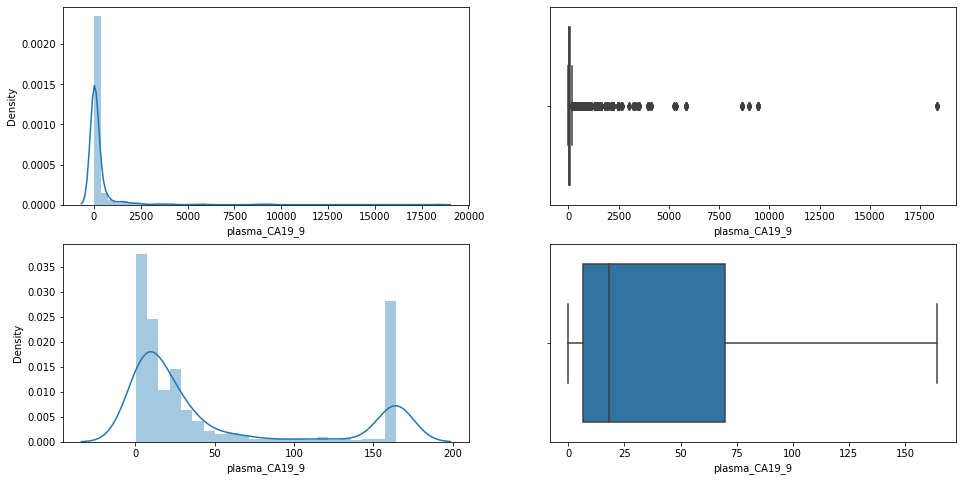

In [ ]:
#plasma_CA19_9
#Finding the IQR value
percentile25=df['plasma_CA19_9'].quantile(0.25)
percentile75=df['plasma_CA19_9'].quantile(0.75)
print("percentile75 of  plasma_CA19_9=",percentile75)
print("prcentile25 of plasma_CA19_9=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['plasma_CA19_9']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['plasma_CA19_9']=np.where(
    new_df_cap['plasma_CA19_9']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['plasma_CA19_9']<lower_limit,
        lower_limit,
        new_df_cap['plasma_CA19_9']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['plasma_CA19_9'])
plt.subplot(2,2,2)
sns.boxplot(df['plasma_CA19_9'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['plasma_CA19_9'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['plasma_CA19_9'])
plt.show()

In [ ]:
print(df['creatinine'].describe())

count    4970.000000
mean        0.843572
std         0.648100
min         0.056550
25%         0.350610
50%         0.735150
75%         1.131000
max         5.360000
Name: creatinine, dtype: float64


percentile75 of  creatinine= 1.131
prcentile25 of creatinine= 0.35061
iqr 0.78039
Upper_limit 2.301585
Lower_limit -0.819975
percentile75 of  creatinine= 1.131
prcentile25 of creatinine= 0.35061
iqr 0.78039
Upper_limit 2.301585
Lower_limit -0.819975
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
144        S64        Cohort1          BPTB   48    2          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
230       S328        Cohort2          BPTB   62    1          2   NaN   
271       S204        Cohort1           LIV   70    2          2   NaN   
272       S205        Cohort1           LIV   31    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4493       NaN            NaN           NaN   68    1          2   NaN   
4643       NaN            NaN           NaN   73    1          1   NaN   
4650       NaN            NaN           NaN   62    1          1   NaN   
4969      

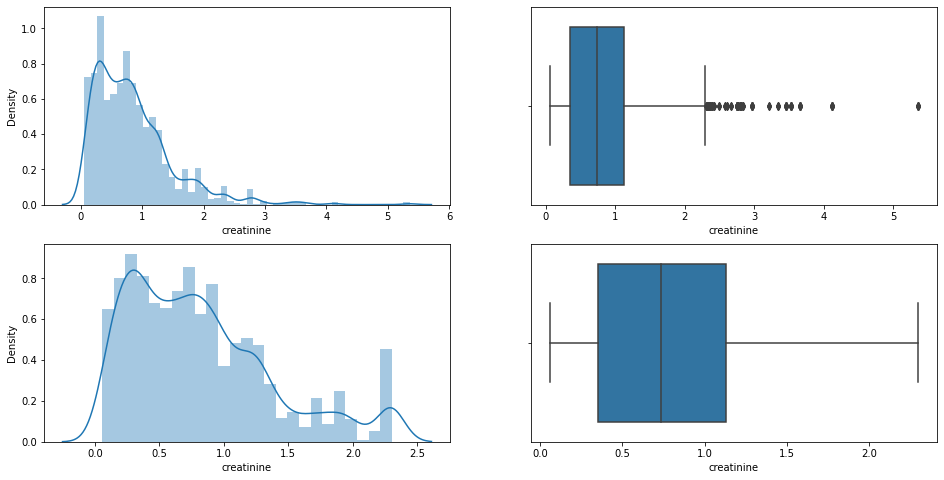

In [ ]:
#creatinine
#Finding the IQR value
percentile25=df['creatinine'].quantile(0.25)
percentile75=df['creatinine'].quantile(0.75)
print("percentile75 of  creatinine=",percentile75)
print("prcentile25 of creatinine=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)#creatinine
#Finding the IQR value
percentile25=df['creatinine'].quantile(0.25)
percentile75=df['creatinine'].quantile(0.75)
print("percentile75 of  creatinine=",percentile75)
print("prcentile25 of creatinine=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['creatinine']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['creatinine']=np.where(
    new_df_cap['creatinine']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['creatinine']<lower_limit,
        lower_limit,
        new_df_cap['creatinine']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['creatinine'])
plt.subplot(2,2,2)
sns.boxplot(df['creatinine'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['creatinine'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['creatinine'])
plt.show()

In [ ]:
print(df['LYVE1'].describe())

count    4950.000000
mean        2.300999
std         3.111772
min         0.000129
25%         0.004976
50%         0.901411
75%         3.900891
max        23.890323
Name: LYVE1, dtype: float64


percentile75 of  LYVE1= 3.900891
prcentile25 of LYVE1= 0.0049764
iqr 3.8959146000000002
Upper_limit 9.7447629
Lower_limit -5.8388955
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
321       S228        Cohort1           ESP   55    1          2   NaN   
391       S497        Cohort1           ESP   81    2          2     I   
395       S401        Cohort1           LIV   73    1          2    IB   
408       S498        Cohort1           ESP   53    1          2    II   
410       S504        Cohort1           ESP   54    1          2    II   
...        ...            ...           ...  ...  ...        ...   ...   
4436       NaN            NaN           NaN   40    1          2   NaN   
4475       NaN            NaN           NaN   45    2          2   NaN   
4483       NaN            NaN           NaN   62    2          2   NaN   
4488       NaN            NaN           NaN   65    1          2   NaN   
4496       NaN            NaN           NaN   58    2

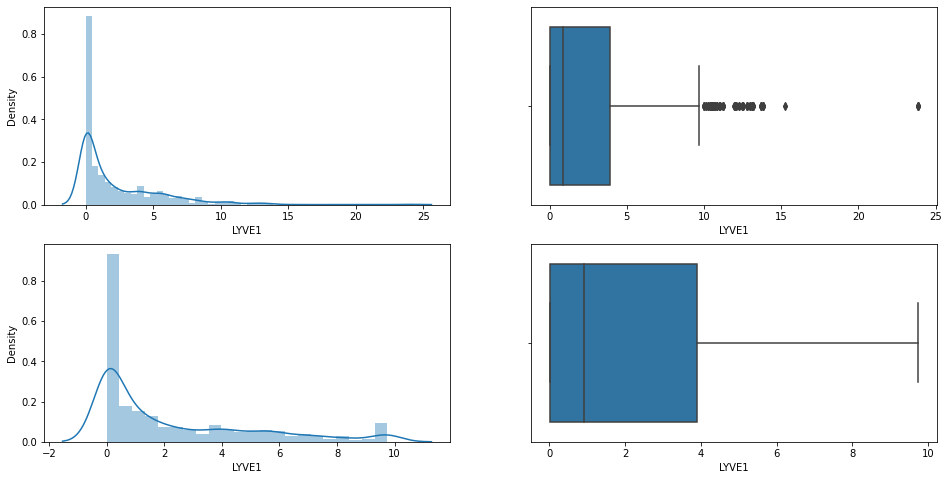

In [ ]:
#LYVE1
#Finding the IQR value
percentile25=df['LYVE1'].quantile(0.25)
percentile75=df['LYVE1'].quantile(0.75)
print("percentile75 of  LYVE1=",percentile75)
print("prcentile25 of LYVE1=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)


#finding outliers
print(df[df['LYVE1']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['LYVE1']=np.where(
    new_df_cap['LYVE1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['LYVE1']<lower_limit,
        lower_limit,
        new_df_cap['LYVE1']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['LYVE1'])
plt.subplot(2,2,2)
sns.boxplot(df['LYVE1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['LYVE1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['LYVE1'])
plt.show()

In [ ]:
print(df['REG1B'].describe())

count    4931.000000
mean       65.335583
std       126.782584
min         0.001104
25%         7.232498
50%        21.571088
75%        67.468000
max      1293.819450
Name: REG1B, dtype: float64


percentile75 of  REG1B= 67.468
prcentile25 of REG1B= 7.232498
iqr 60.235502000000004
Upper_limit 157.821253
Lower_limit -83.120755
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
11        S109        Cohort2          BPTB   71    1          1   NaN   
52        S146        Cohort2          BPTB   63    2          1   NaN   
78         S17        Cohort1          BPTB   49    1          1   NaN   
133        S54        Cohort1          BPTB   62    1          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4833       NaN            NaN           NaN   78    2          1   NaN   
4876       NaN            NaN           NaN   73    1          1   NaN   
4917       NaN            NaN           NaN   64    2          1   NaN   
4943       NaN            NaN           NaN   40    2          1   NaN   
4998       NaN            NaN           NaN   48    1  

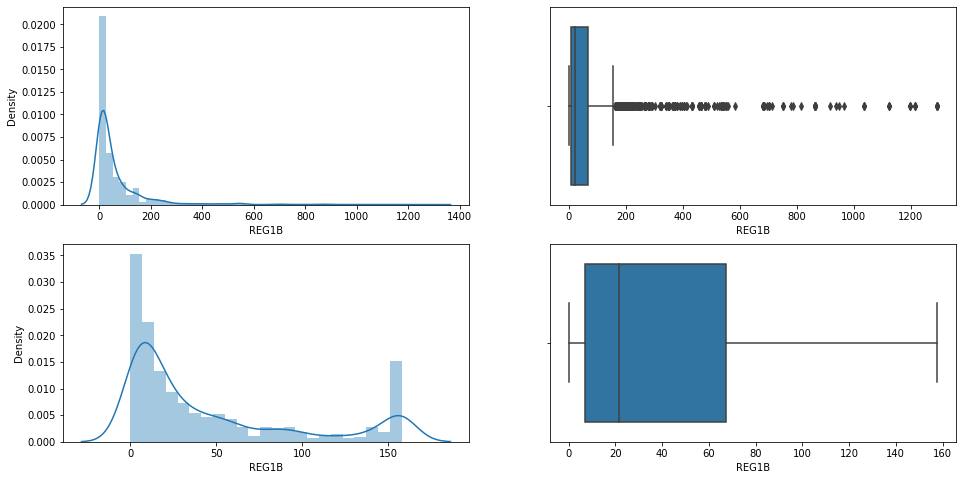

In [ ]:
#REG1B
#Finding the IQR value
percentile25=df['REG1B'].quantile(0.25)
percentile75=df['REG1B'].quantile(0.75)
print("percentile75 of  REG1B=",percentile75)
print("prcentile25 of REG1B=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['REG1B']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['REG1B']=np.where(
    new_df_cap['REG1B']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['REG1B']<lower_limit,
        lower_limit,
        new_df_cap['REG1B']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['REG1B'])
plt.subplot(2,2,2)
sns.boxplot(df['REG1B'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['REG1B'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['REG1B'])
plt.show()

In [ ]:
print(df['TFF1'].describe())

count     4922.000000
mean       320.803147
std        782.380984
min          0.005293
25%          7.113679
50%         97.258522
75%        324.669300
max      13344.300000
Name: TFF1, dtype: float64


percentile75 of  TFF1= 324.6693
prcentile25 of TFF1= 7.113679
iqr 317.55562100000003
Upper_limit 801.0027315000001
Lower_limit -469.2197525000001
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
31        S127        Cohort2          BPTB   44    2          1   NaN   
35        S130        Cohort2          BPTB   44    2          1   NaN   
42        S137        Cohort2          BPTB   48    2          1   NaN   
43        S138        Cohort2          BPTB   89    2          1   NaN   
100        S24        Cohort1          BPTB   56    2          1   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4854       NaN            NaN           NaN   60    2          1   NaN   
4875       NaN            NaN           NaN   60    1          1   NaN   
4930       NaN            NaN           NaN   53    2          1   NaN   
4971       NaN            NaN           NaN   40    2          1   NaN   
4992       NaN            NaN           

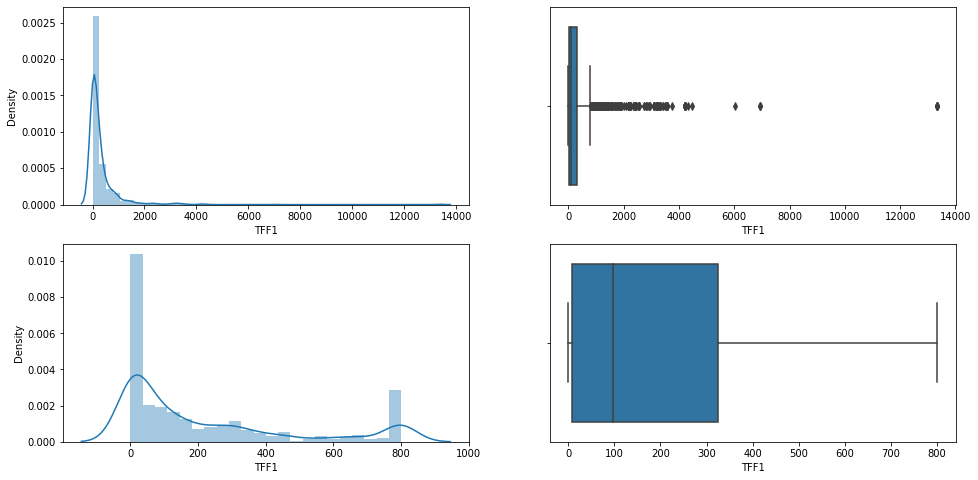

In [ ]:
#TFF1
#Finding the IQR value
percentile25=df['TFF1'].quantile(0.25)
percentile75=df['TFF1'].quantile(0.75)
print("percentile75 of  TFF1=",percentile75)
print("prcentile25 of TFF1=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['TFF1']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['TFF1']=np.where(
    new_df_cap['TFF1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['TFF1']<lower_limit,
        lower_limit,
        new_df_cap['TFF1']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['TFF1'])
plt.subplot(2,2,2)
sns.boxplot(df['TFF1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['TFF1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TFF1'])
plt.show()

In [ ]:
print(df['REG1A'].describe())

count    4868.000000
mean      606.466401
std      1048.823889
min         7.320000
25%       156.000000
50%       324.000000
75%       533.000000
max      9823.000000
Name: REG1A, dtype: float64


percentile75 of REG1A= 533.0
prcentile25 of REG1A= 156.0
iqr 377.0
Upper_limit 1098.5
Lower_limit -409.5
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
3         S101        Cohort2          BPTB   61    1          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
189       S338        Cohort1          BPTB   52    1          2   NaN   
193       S263        Cohort2          BPTB   71    1          2   NaN   
194       S274        Cohort2          BPTB   52    2          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4956       NaN            NaN           NaN   26    2          1   NaN   
4960       NaN            NaN           NaN   67    2          1   NaN   
4974       NaN            NaN           NaN   58    1          1   NaN   
4978       NaN            NaN           NaN   84    1          1   NaN   
4996       NaN            NaN           NaN   46    1          1   NaN   

      

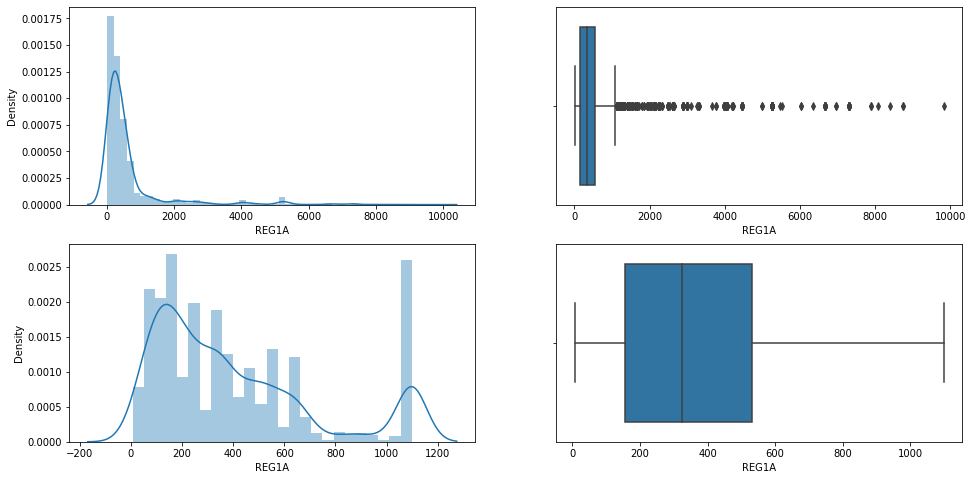

In [ ]:
#REG1A
#Finding the IQR value
percentile25=df['REG1A'].quantile(0.25)
percentile75=df['REG1A'].quantile(0.75)
print("percentile75 of REG1A=",percentile75)
print("prcentile25 of REG1A=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['REG1A']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['REG1A']=np.where(
    new_df_cap['REG1A']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['REG1A']<lower_limit,
        lower_limit,
        new_df_cap['REG1A']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['REG1A'])
plt.subplot(2,2,2)
sns.boxplot(df['REG1A'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['REG1A'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['REG1A'])
plt.show()

In [ ]:
print(df['CEA'].describe())

count      4894.000000
mean       1855.778957
std       28123.610249
min           0.001000
25%           2.013500
50%           4.040000
75%           7.650000
max      430214.025000
Name: CEA, dtype: float64


percentile75 of  CEA= 7.65
prcentile25 of CEA= 2.0135
iqr 5.6365
Upper_limit 16.104750000000003
Lower_limit -6.44125
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
168        S86        Cohort2          BPTB   72    2          1   NaN   
428       S403        Cohort1           LIV   66    1          2   IIB   
496       S397        Cohort1           LIV   65    2          2   III   
829        NaN            NaN           NaN   26    1          1   NaN   
983        NaN            NaN           NaN   77    1          1   NaN   
1042       NaN            NaN           NaN   57    2          1   NaN   
1335       NaN            NaN           NaN   56    1          1   NaN   
1403       NaN            NaN           NaN   44    2          2   NaN   
1552       NaN            NaN           NaN   50    1          1   NaN   
1553       NaN            NaN           NaN   49    2          1   NaN   
1554       NaN            NaN           NaN   63    1          1   Na

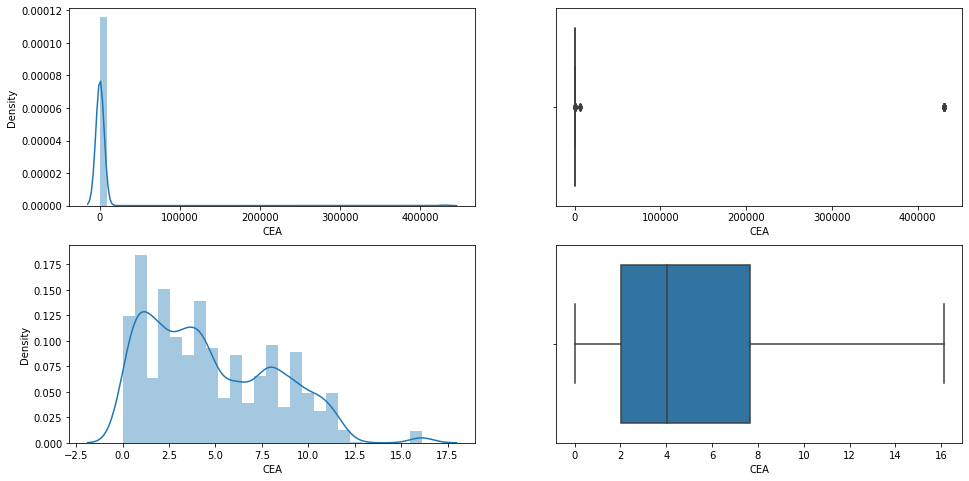

In [ ]:
#CEA
#Finding the IQR value
percentile25=df['CEA'].quantile(0.25)
percentile75=df['CEA'].quantile(0.75)
print("percentile75 of  CEA=",percentile75)
print("prcentile25 of CEA=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['CEA']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['CEA']=np.where(
    new_df_cap['CEA']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CEA']<lower_limit,
        lower_limit,
        new_df_cap['CEA']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CEA'])
plt.subplot(2,2,2)
sns.boxplot(df['CEA'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['CEA'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CEA'])
plt.show()

In [ ]:
print(df['CA125'].describe())

count     4879.000000
mean       390.238756
std       1333.296048
min          0.056476
25%         12.000000
50%         34.874470
75%        195.000000
max      18360.000000
Name: CA125, dtype: float64


percentile75 of  CA125= 195.0
prcentile25 of CA125= 12.0
iqr 183.0
Upper_limit 469.5
Lower_limit -262.5
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
238       S353        Cohort2          BPTB   48    1          2   NaN   
250       S331        Cohort2          BPTB   79    1          2   NaN   
303       S262        Cohort2          BPTB   69    1          2   NaN   
304       S264        Cohort1          BPTB   57    1          2   NaN   
306       S281        Cohort1          BPTB   62    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4488       NaN            NaN           NaN   65    1          2   NaN   
4490       NaN            NaN           NaN   78    2          2   NaN   
4491       NaN            NaN           NaN   61    2          2   NaN   
4497       NaN            NaN           NaN   66    2          2   NaN   
4498       NaN            NaN           NaN   55    1          2   NaN   

       

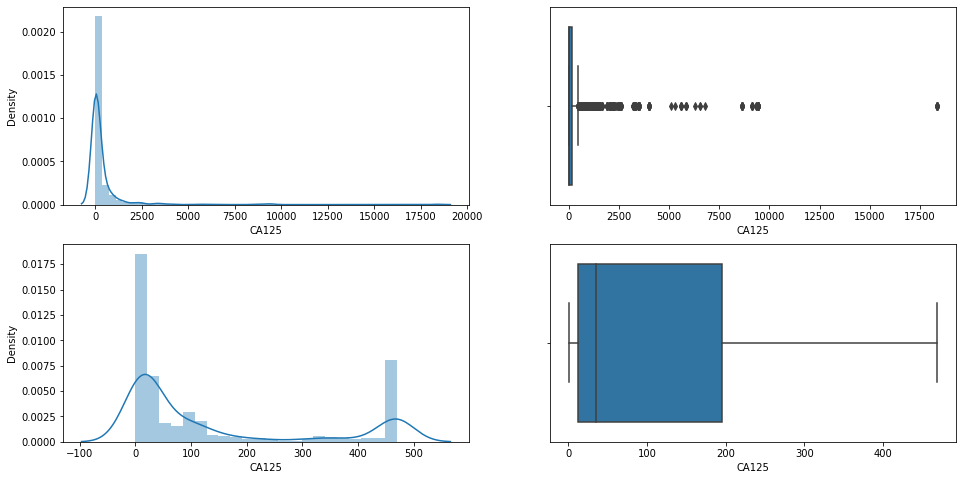

In [ ]:
#CA125
#Finding the IQR value
percentile25=df['CA125'].quantile(0.25)
percentile75=df['CA125'].quantile(0.75)
print("percentile75 of  CA125=",percentile75)
print("prcentile25 of CA125=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['CA125']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['CA125']=np.where(
    new_df_cap['CA125']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CA125']<lower_limit,
        lower_limit,
        new_df_cap['CA125']
        )
    )
new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CA125'])
plt.subplot(2,2,2)
sns.boxplot(df['CA125'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['CA125'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CA125'])
plt.show()

In [ ]:
print(df['HbA1c'].describe())

count    4814.000000
mean       90.837349
std        83.176853
min        11.000000
25%        47.000000
50%        53.000000
75%        91.000000
max      2215.000000
Name: HbA1c, dtype: float64


percentile75 of  HbA1c= 91.0
prcentile25 of HbA1c= 47.0
iqr 44.0
Upper_limit 157.0
Lower_limit -19.0
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
365       S324        Cohort2          BPTB   41    1          2   NaN   
375       S359        Cohort2          BPTB   44    2          2   NaN   
379       S276        Cohort2          BPTB   59    2          2   NaN   
385       S335        Cohort2          BPTB   75    2          2   NaN   
386       S360        Cohort2          BPTB   49    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4493       NaN            NaN           NaN   68    1          2   NaN   
4494       NaN            NaN           NaN   54    2          2   NaN   
4495       NaN            NaN           NaN   54    2          2   NaN   
4496       NaN            NaN           NaN   58    2          2   NaN   
4497       NaN            NaN           NaN   66    2          2   NaN   

          

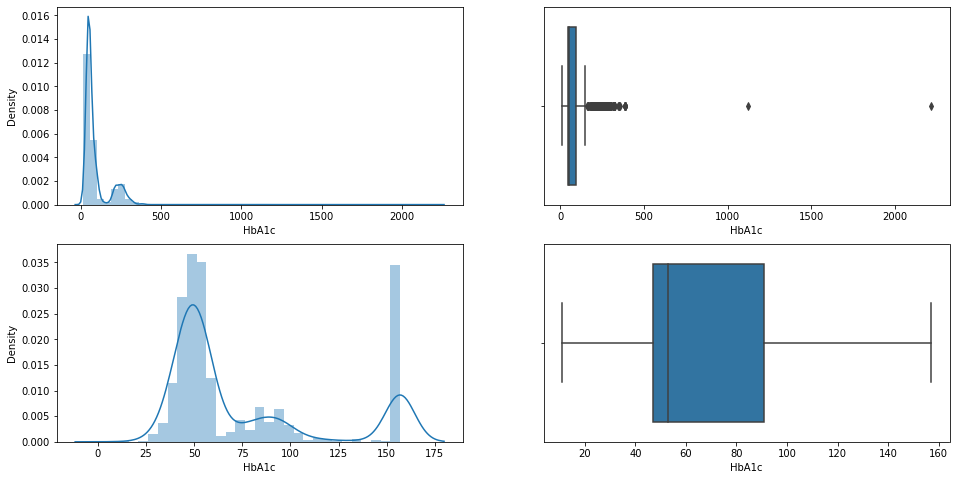

In [ ]:
#HbA1c
#Finding the IQR value
percentile25=df['HbA1c'].quantile(0.25)
percentile75=df['HbA1c'].quantile(0.75)
print("percentile75 of  HbA1c=",percentile75)
print("prcentile25 of HbA1c=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['HbA1c']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['HbA1c']=np.where(
    new_df_cap['HbA1c']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['HbA1c']<lower_limit,
        lower_limit,
        new_df_cap['HbA1c']
        )
    )
new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['HbA1c'])
plt.subplot(2,2,2)
sns.boxplot(df['HbA1c'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['HbA1c'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['HbA1c'])
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
X_train_trf=knn.fit_transform(X_train)
X_test_trf=knn.transform(X_test)

In [ ]:
print(pd.DataFrame(X_train_trf).head(60))

          0         1         2         3         4         5         6   \
0   0.346923 -1.056879 -0.243565 -1.072854  0.044107 -0.345939 -0.032960   
1   0.617929 -1.056879  0.178559  0.023234  0.981104  0.038771  0.452942   
2   0.075917  0.946182 -0.243898 -0.794482 -0.739767 -0.482750 -0.250733   
3  -0.940354  0.946182 -0.238376 -0.202943 -0.693875 -0.289586 -0.250078   
4  -2.024376  0.946182 -0.248239  0.145022 -0.740480 -0.517910 -0.024252   
5   0.482426 -1.056879 -0.251119  1.623871 -0.737995 -0.476611 -0.394091   
6  -0.466094 -1.056879 -0.244908 -1.212040  0.622739 -0.510300 -0.254722   
7   0.346923  0.946182 -0.207207 -0.359527 -0.740524 -0.041362 -0.415844   
8  -1.143608  0.946182 -0.236131 -0.933668 -0.556997 -0.500771 -0.049680   
9   1.566448 -1.056879 -0.253711 -0.081155 -0.212584  0.396533 -0.065394   
10  0.685680  0.946182 -0.234329 -0.133350 -0.734451 -0.449036 -0.032960   
11 -1.346862  0.946182 -0.251119 -0.411721 -0.740407 -0.502394  0.009201   
12  1.566448

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trf,Y_train)

Y_pred_lr = lr.predict(X_test_trf)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_lr)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_lr))
print("The accuracy score achieved using Logistic Regression is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using Logistic Regression is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using Logistic Regression is",specificity)
print(metrics.classification_report(Y_test,Y_pred_lr))

The accuracy score achieved using Logistic Regression is: 98.7 %
Confusion Matrix: [[651   0]
 [ 13 336]]
The accuracy score achieved using Logistic Regression is 0.987
The Sensitivity score achieved using Logistic Regression is 1.0
The Specificity score achieved using Logistic Regression is 0.9627507163323782
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       651
           2       1.00      0.96      0.98       349

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
#Adding KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_trf,Y_train)
y_pred=knn.predict(X_test_trf)
score_knn = round(accuracy_score(y_pred,Y_test)*100,2)
print("The accuracy score achieved using KNeighbors is: "+str(score_knn)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,y_pred))
print("The accuracy score achieved using KNeighbors Classifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using KNeighbors Classifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using KNeighbors Classifier is",specificity)
print(metrics.classification_report(Y_test,y_pred))

The accuracy score achieved using KNeighbors is: 92.0 %
Confusion Matrix: [[643   8]
 [ 72 277]]
The accuracy score achieved using KNeighbors Classifier is 0.92
The Sensitivity score achieved using KNeighbors Classifier is 0.9877112135176651
The Specificity score achieved using KNeighbors Classifier is 0.7936962750716332
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       651
           2       0.97      0.79      0.87       349

    accuracy                           0.92      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_trf,Y_train)
    Y_pred_dt = dt.predict(X_test_trf)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_trf,Y_train)
Y_pred_dt = dt.predict(X_test_trf)
print(Y_pred_dt.shape)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_dt)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_dt))
print("The accuracy score achieved using DecisionTreeClassifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using DecisionTreeClassifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using DecisionTreeClassifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred_dt))
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

99.3
1
(1000,)
Confusion Matrix: [[649   2]
 [  5 344]]
The accuracy score achieved using DecisionTreeClassifier is 0.993
The Sensitivity score achieved using DecisionTreeClassifier is 0.9969278033794163
The Specificity score achieved using DecisionTreeClassifier is 0.9856733524355301
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       651
           2       0.99      0.99      0.99       349

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_trf,Y_train)
    Y_pred_rf = rf.predict(X_test_trf)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_trf,Y_train)
Y_pred_rf = rf.predict(X_test_trf)
Y_pred_rf.shape
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_rf)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_rf))
print("The accuracy score achieved using RandomForestClassifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using RandomForestClassifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using RandomForestClassifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred_rf))
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

99.7
4
Confusion Matrix: [[651   0]
 [  3 346]]
The accuracy score achieved using RandomForestClassifier is 0.997
The Sensitivity score achieved using RandomForestClassifier is 1.0
The Specificity score achieved using RandomForestClassifier is 0.9914040114613181
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       651
           2       1.00      0.99      1.00       349

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
#Adding NaiveBayes Classifier

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_trf,Y_train)
Y_pred=nb.predict(X_test_trf)
score_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
#print("The accuracy score achieved using Naive bayes is: "+str(score_nb)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred))
print("The accuracy score achieved using NaiveBayes Classifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using NaiveBayes Classifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using NaiveBayes Classifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred))

Confusion Matrix: [[630  21]
 [ 10 339]]
The accuracy score achieved using NaiveBayes Classifier is 0.969
The Sensitivity score achieved using NaiveBayes Classifier is 0.967741935483871
The Specificity score achieved using NaiveBayes Classifier is 0.9713467048710601
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       651
           2       0.94      0.97      0.96       349

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
#Adding SVM (support vector machine)Classifier

from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_trf,Y_train)
Y_pred=svm.predict(X_test_trf)
score_svm = round(accuracy_score(Y_pred,Y_test)*100,2)
#print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred))
print("The accuracy score achieved using SVM is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using SVM is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using SVM is",specificity)
print(metrics.classification_report(Y_test,Y_pred))

Confusion Matrix: [[649   2]
 [ 15 334]]
The accuracy score achieved using SVM is 0.983
The Sensitivity score achieved using SVM is 0.9969278033794163
The Specificity score achieved using SVM is 0.9570200573065902
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       651
           2       0.99      0.96      0.98       349

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#Output final score
scores = [score_lr,score_knn,score_dt,score_rf,score_nb,score_svm]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","Naive Bayes","Support Vector Machine"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 98.7 %
The accuracy score achieved using K-Nearest Neighbors is: 92.0 %
The accuracy score achieved using Decision Tree is: 99.3 %
The accuracy score achieved using Random Forest is: 99.7 %
The accuracy score achieved using Naive Bayes is: 96.9 %
The accuracy score achieved using Support Vector Machine is: 98.3 %


AttributeError: ignored

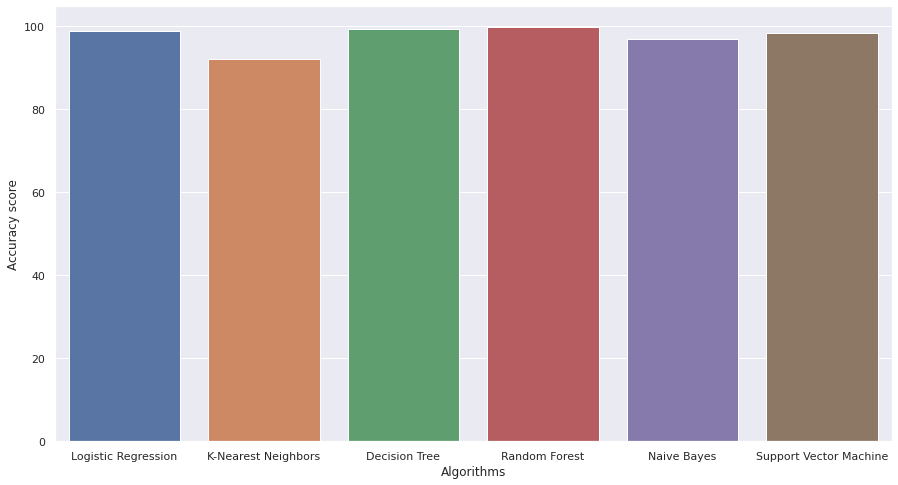

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

ax=sns.barplot(algorithms,scores)
ax.bar_label(ax.containers[0])

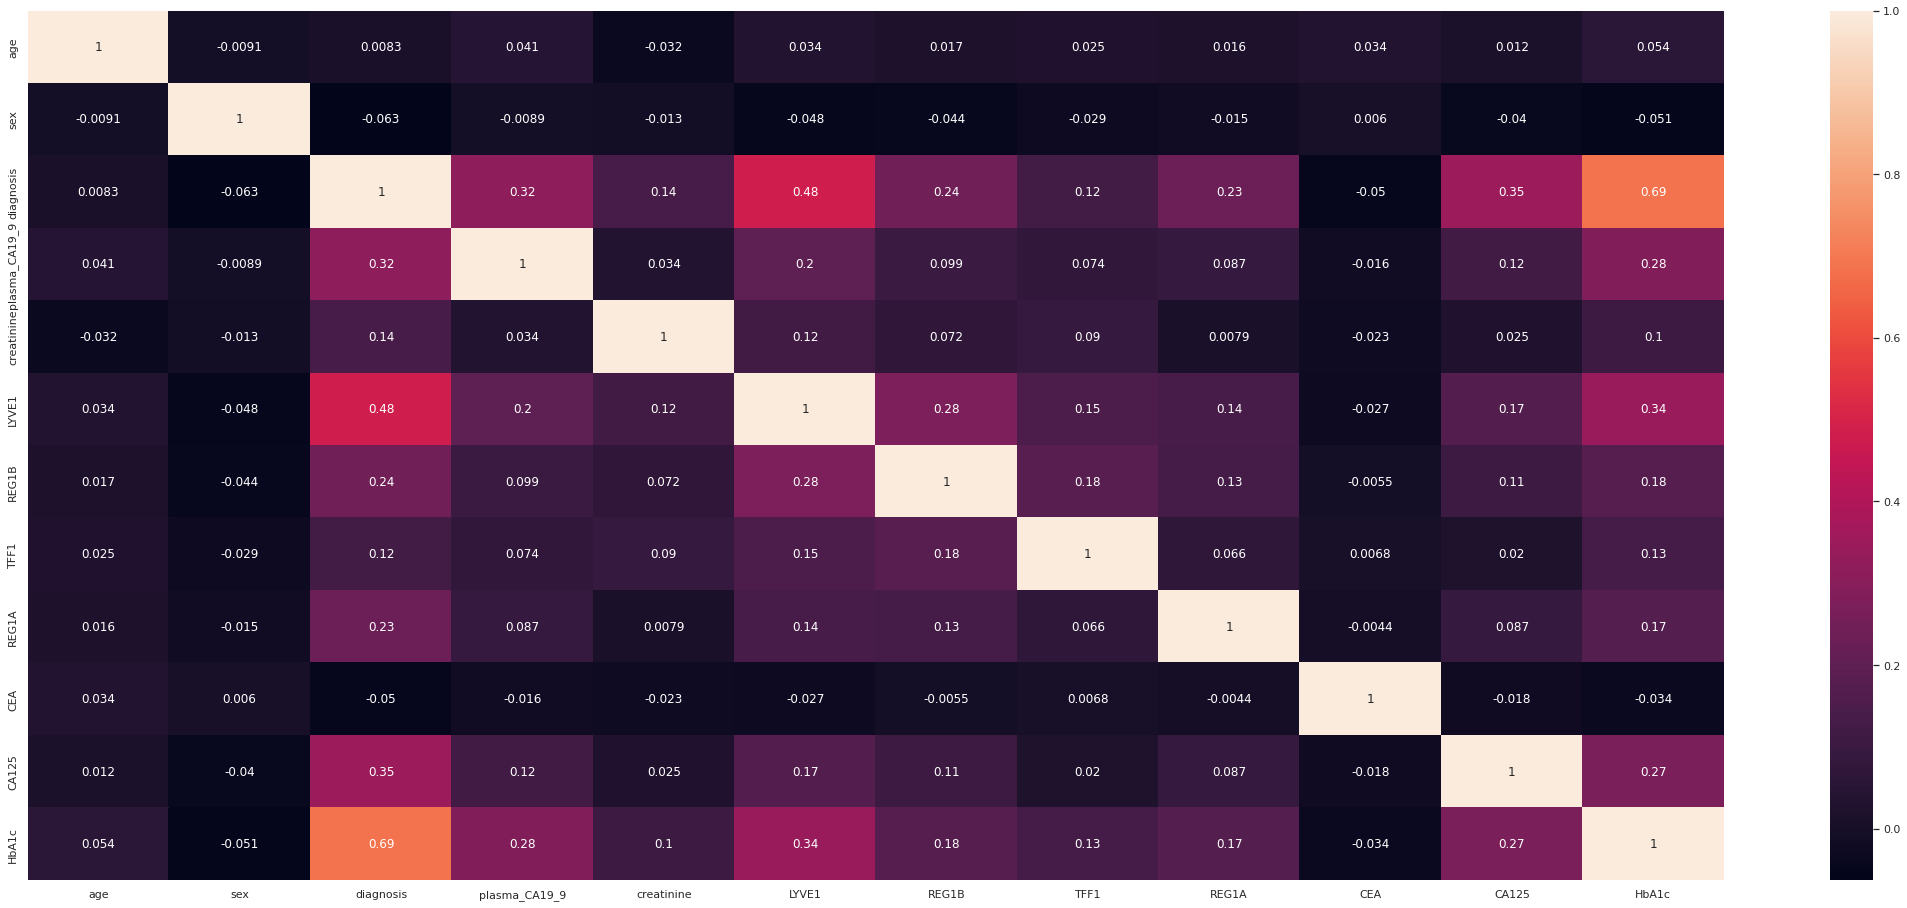

In [ ]:
plt.figure(figsize=(38,16))
sns.heatmap(df.corr(),annot=True)
plt.show()